<a href="https://colab.research.google.com/github/nieyangfei/EGG_Big_Data/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing Packages for Task 2
install.packages('factoextra')
install.packages('cluster')
library(datasets) # Will be used in final task
library(factoextra)
library(cluster)

# Load the USArrests dataset
df <- USArrests
# Remove rows with missing values
df <- na.omit(df)
# Scale each variable to have a mean of 0 and standard deviation of 1
df <- scale(df)
# View the first six rows of the scaled dataset
head(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘mvtnorm’, ‘numDeriv’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


# Task 1&2: Setting Up & Loading Packages and Preparing Data

# Task 3: Finding the Optimal Number of Clusters

##  The Elbow Method

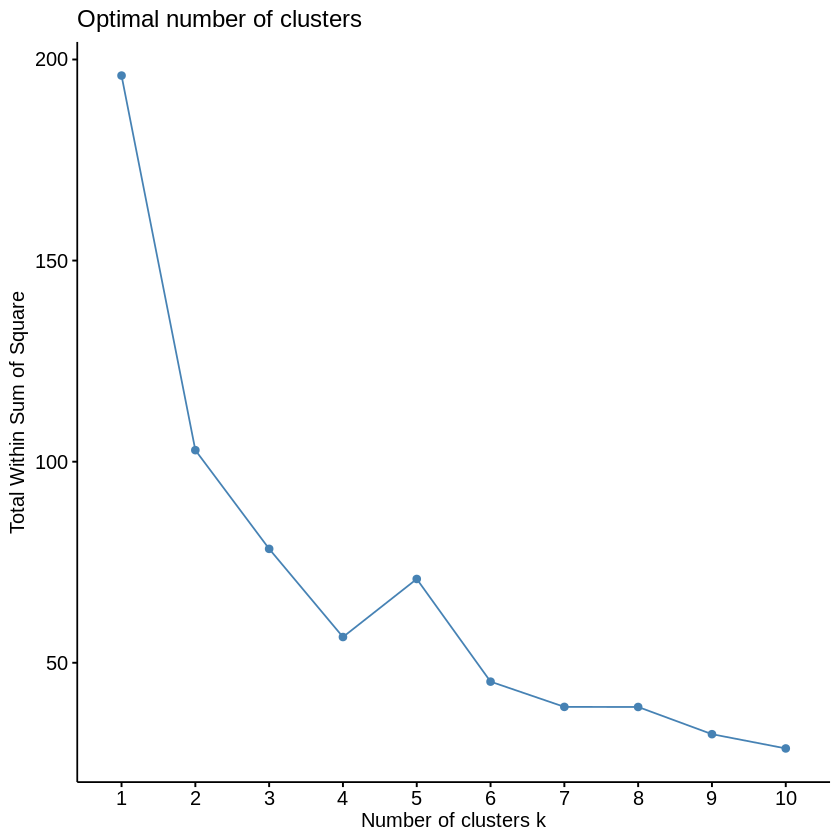

In [ ]:
# Use the fviz_nbclust function, providing kmeans as clustering function and
# wss as method.
elbow_plot <- fviz_nbclust(df, kmeans, method = "wss", k.max = 10)
# Print the elbow plot
print(elbow_plot)

## The Gap Statistic

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>.”


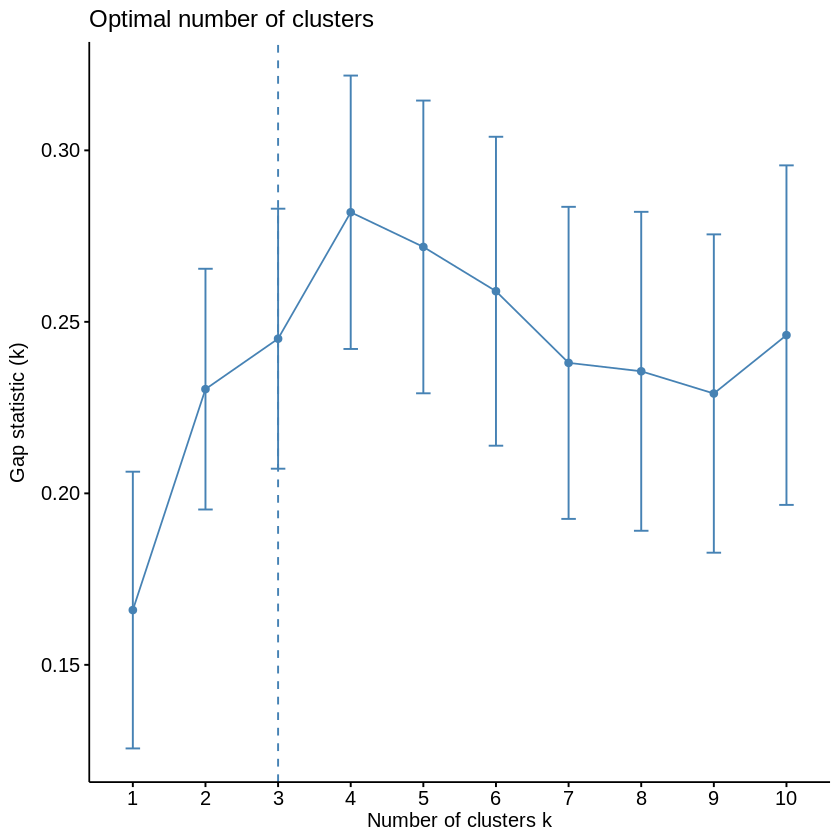

In [ ]:
#calculate gap statistic based on number of clusters
gap_stat <- clusGap(df, FUN = kmeans, nstart = 25, K.max = 10, B = 50)
fviz_gap_stat(gap_stat)

4 clusters are the ideal.

# Task 4: Performing and Visualizing K-Means Clustering

K-means clustering with 4 clusters of sizes 13, 13, 16, 8

Cluster means:
      Murder    Assault   UrbanPop        Rape
1 -0.9615407 -1.1066010 -0.9301069 -0.96676331
2  0.6950701  1.0394414  0.7226370  1.27693964
3 -0.4894375 -0.3826001  0.5758298 -0.26165379
4  1.4118898  0.8743346 -0.8145211  0.01927104

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             4              2              2              4              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              4 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              1              2              3              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              1              4              1              2 
 Massachusetts       Michigan      Minnesota    Mississippi    

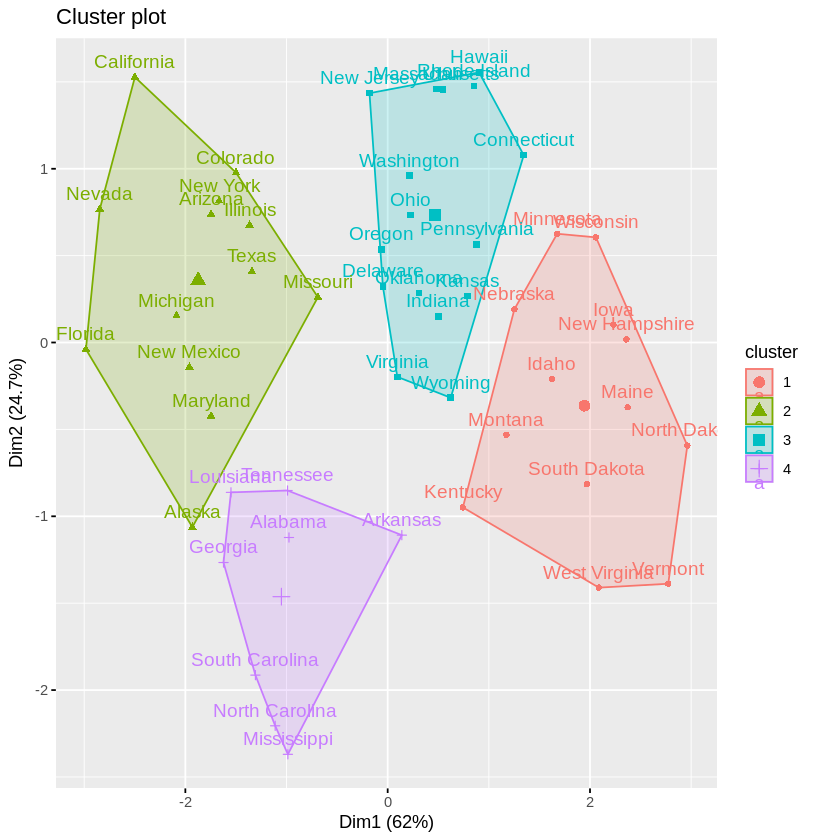

In [ ]:
# Set a seed for reproducibility
set.seed(1)
# Perform K-means clustering with k = 4 clusters and nstart = 25
km <- kmeans(df, centers = 4, nstart = 25)
# View the results
km
# View
fviz_cluster(km, df)

In [ ]:
# Find the means of each cluster on the original (unscaled) data
cluster_means <- aggregate(USArrests, by = list(Cluster = km$cluster), FUN = mean)
# Print the cluster means
print(cluster_means)
# Add cluster assigment to original data
final_data <- cbind(USArrests, cluster = km$cluster)
# View final data
head(final_data)


  Cluster   Murder   Assault UrbanPop     Rape
1       1  3.60000  78.53846 52.07692 12.17692
2       2 10.81538 257.38462 76.00000 33.19231
3       3  5.65625 138.87500 73.87500 18.78125
4       4 13.93750 243.62500 53.75000 21.41250


,Murder,Assault,UrbanPop,Rape,cluster
,<dbl>,<int>,<int>,<dbl>,<int>
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,4
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2


# Task 5: Additional Practice

## Clustering the Iris Dataset

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052
-0.5353840,1.93331463,-1.165809,-1.048667


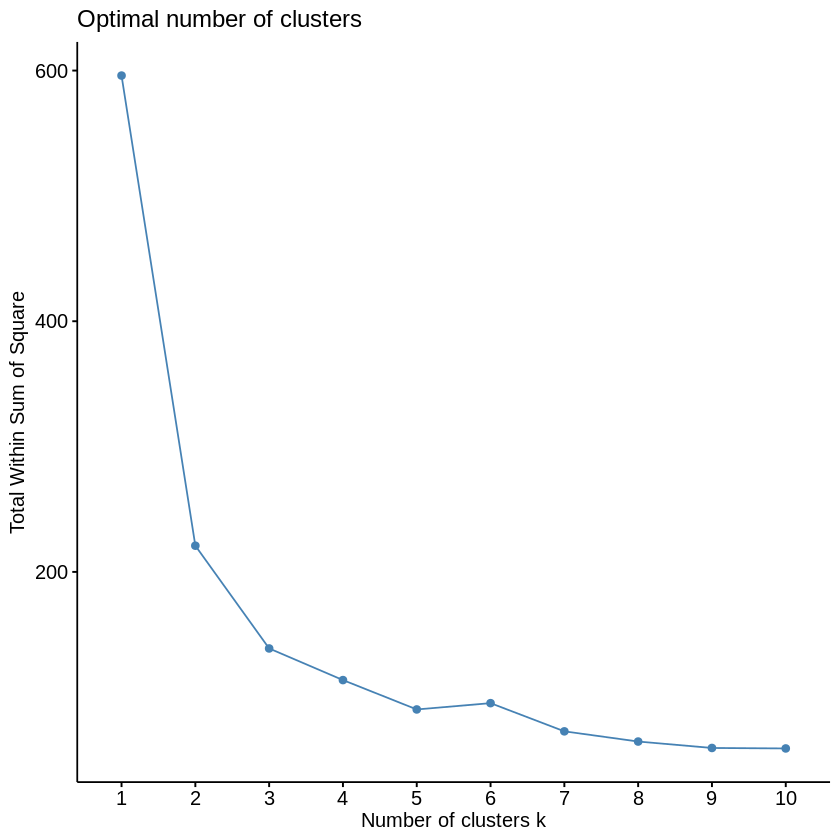

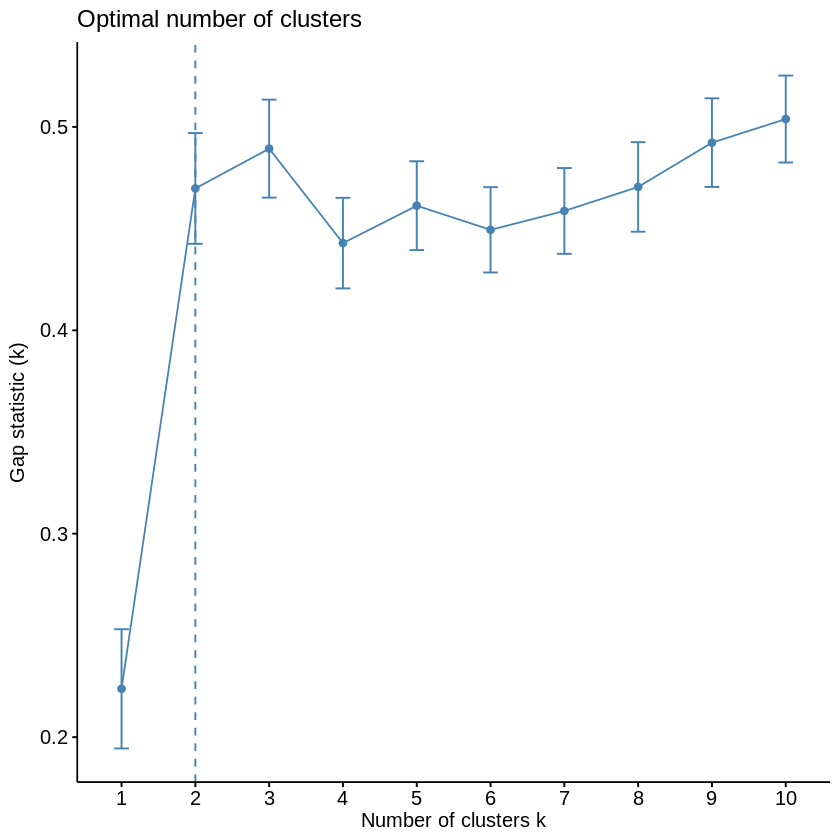

In [ ]:
#Load the iris dataset with the data() function. Create a new data frame containing only the first four columns (the numeric measurements)
data(iris)
head(iris)
iris_attribute <- iris[,1:4]
head(iris_attribute)
# Scale your new data frame.
iris_attribute <- scale(iris_attribute)
head(iris_attribute)

# Use the Elbow Method (fviz nbclust) to find the optimal number of clusters. Does the result make sense given what you know about the dataset?
# wss as method.
elbow_plot <- fviz_nbclust(iris_attribute, kmeans, method = "wss", k.max = 10)
# Print the elbow plot
print(elbow_plot)

#calculate gap statistic based on number of clusters
gap_stat <- clusGap(iris_attribute, FUN = kmeans, nstart = 25, K.max = 10, B = 50)
fviz_gap_stat(gap_stat)





Well, I Googled and find that there are three types of Iris but the elbow shows that there are five types.

K-means clustering with 3 clusters of sizes 53, 47, 50

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1  -0.05005221 -0.88042696    0.3465767   0.2805873
2   1.13217737  0.08812645    0.9928284   1.0141287
3  -1.01119138  0.85041372   -1.3006301  -1.2507035

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 [75] 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
[112] 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
[149] 2 1

Within cluster sum of squares by cluster:
[1] 44.08754 47.45019 47.35062
 (between_SS / total_SS =  76.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

   
    setosa versicolor virginica
  1      0         39        14
  2      0         11        36
  3     50          0         0

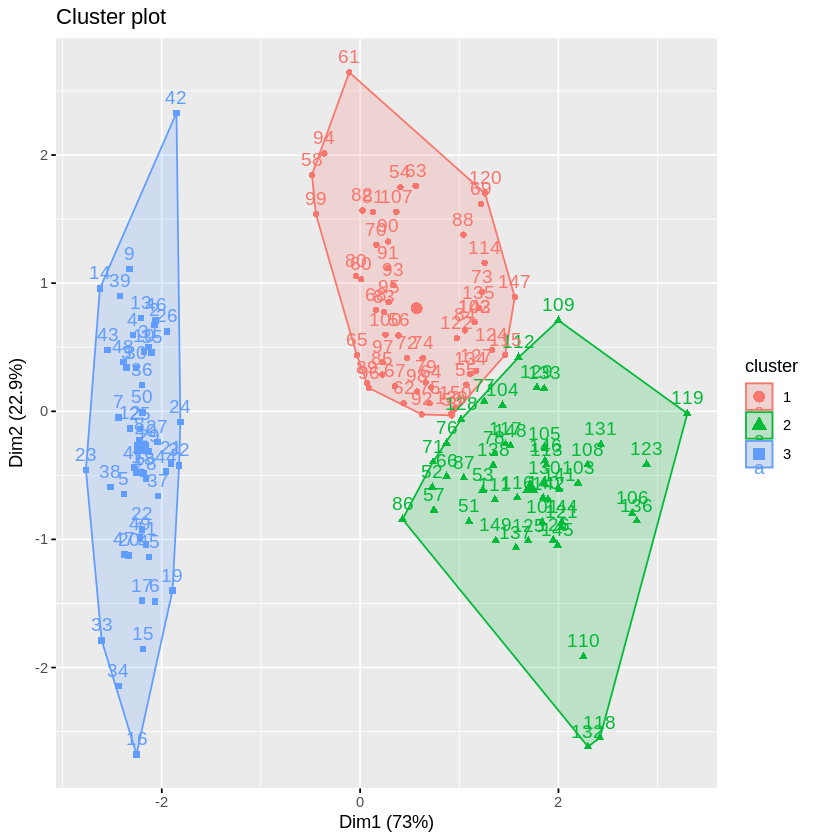

In [ ]:
# Set a seed for reproducibility
set.seed(1)
# Perform K-means clustering with k = 3 clusters and nstart = 25
km <- kmeans(iris_attribute, centers = 3, nstart = 25)
# View the results
km
# View
fviz_cluster(km, iris_attribute)
# Challenge: How well did the clustering work? Compare your cluster assignments with the actual species using the command table(your kmeans result$cluster, iris$Species).
table(km$cluster, iris$Species)


In [ ]:
Well, same groups thanks to gap diagram.

Well, my K-means tangles some actual species into one group.

## Clustering the mtcars Dataset

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.610399567,-0.7771651,-0.8680278,1.1899014,0.4235542,0.7352031
Mazda RX4 Wag,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.349785269,-0.4637808,-0.8680278,1.1899014,0.4235542,0.7352031
Datsun 710,0.4495434,-1.2248578,-0.99018209,-0.7830405,0.4739996,-0.917004624,0.4260068,1.1160357,1.1899014,0.4235542,-1.1221521
Hornet 4 Drive,0.2172534,-0.1049878,0.22009369,-0.5350928,-0.9661175,-0.002299538,0.8904872,1.1160357,-0.8141431,-0.9318192,-1.1221521
Hornet Sportabout,-0.2307345,1.0148821,1.04308123,0.4129422,-0.8351978,0.227654255,-0.4637808,-0.8680278,-0.8141431,-0.9318192,-0.5030337
Valiant,-0.3302874,-0.1049878,-0.04616698,-0.6080186,-1.5646078,0.248094592,1.3269868,1.1160357,-0.8141431,-0.9318192,-1.1221521


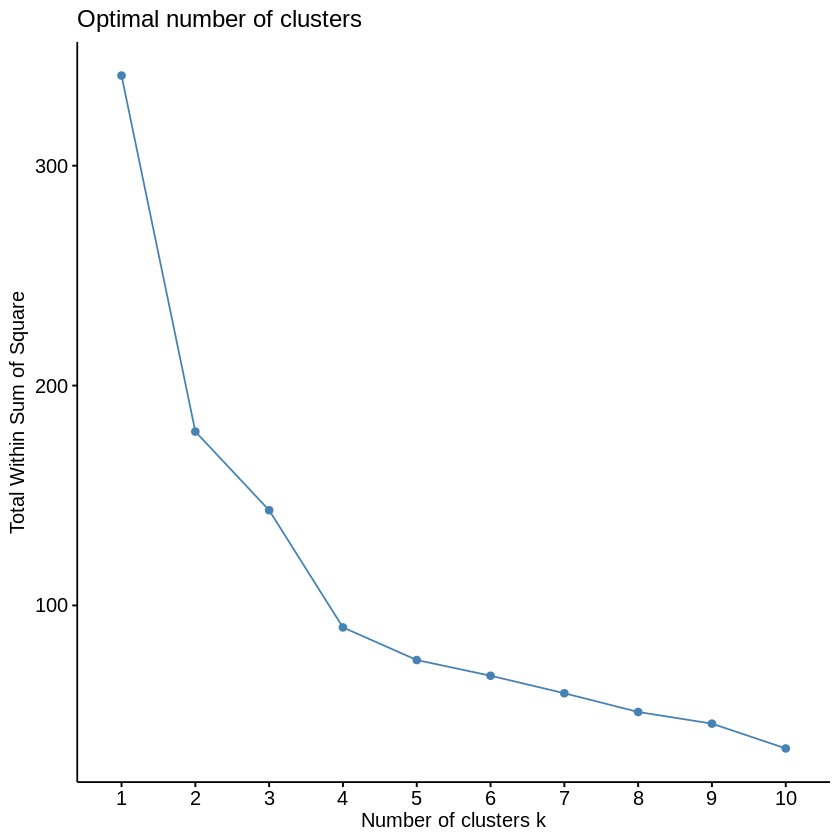

K-means clustering with 3 clusters of sizes 15, 12, 5

Cluster means:
         mpg        cyl        disp         hp       drat         wt       qsec
1  0.7570512 -0.9262258 -0.79938884 -0.8073490  0.5625263 -0.6514165  0.7326758
2 -0.8363478  1.0148821  1.02385129  0.6924910 -0.8897477  0.9063586 -0.3952280
3 -0.2639188  0.3429602 -0.05907659  0.7600688  0.4478156 -0.2210111 -1.2494801
          vs         am       gear       carb
1  0.9837648  0.2546807  0.3331960 -0.6268574
2 -0.8680278 -0.8141431 -0.9318192  0.1676779
3 -0.8680278  1.1899014  1.2367782  1.4781451

Clustering vector:
          Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  3                   3                   1                   1 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  2                   1                   2                   1 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
 

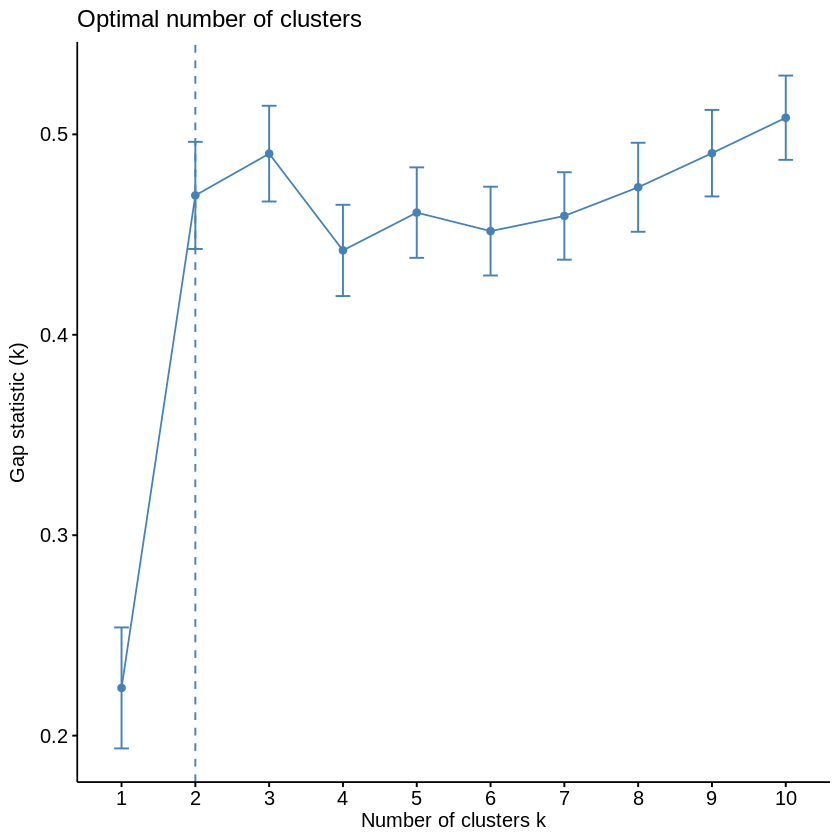

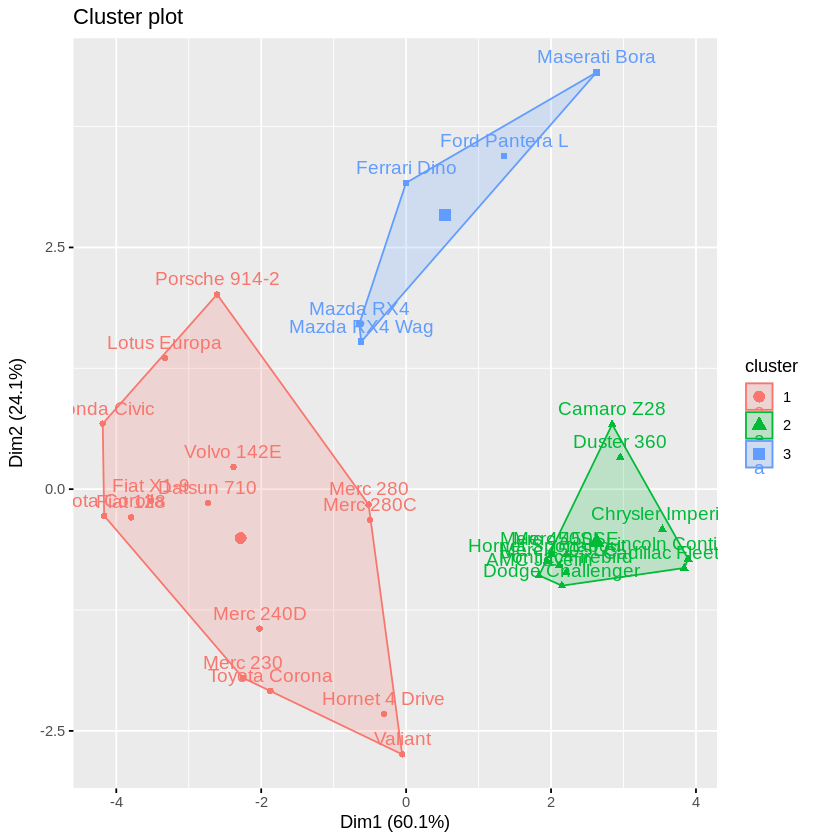

In [ ]:
#Load the dataset with the data() function.
data(mtcars)
head(mtcars)
# Scale your new data frame.
mtcars <- scale(mtcars)
head(mtcars)

# Use the Elbow Method (fviz nbclust) to find the optimal number of clusters. Does the result make sense given what you know about the dataset?
# wss as method.
elbow_plot <- fviz_nbclust(mtcars, kmeans, method = "wss", k.max = 10)
# Print the elbow plot
print(elbow_plot)
#calculate gap statistic based on number of clusters
gap_stat <- clusGap(iris_attribute, FUN = kmeans, nstart = 25, K.max = 10, B = 50)
fviz_gap_stat(gap_stat)

# Set a seed for reproducibility
set.seed(1)
# Perform K-means clustering with k = 3 clusters and nstart = 25
km <- kmeans(mtcars, centers = 3, nstart = 25)
# View the results
km
# View
fviz_cluster(km, mtcars)




## Clustering Air Quality Data

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


,Ozone,Solar.R,Wind,Temp
,<int>,<int>,<dbl>,<int>
1,41,190,7.4,67
2,36,118,8.0,72
3,12,149,12.6,74
4,18,313,11.5,62
7,23,299,8.6,65
8,19,99,13.8,59


,Ozone,Solar.R,Wind,Temp
1,-0.03302982,0.05702761,-0.7138405,-1.1325108
2,-0.18328840,-0.73285918,-0.5451928,-0.6078501
3,-0.90452961,-0.39276904,0.7477726,-0.3979858
4,-0.72421931,1.40641756,0.4385852,-1.6571715
7,-0.57396073,1.25282846,-0.3765451,-1.3423751
8,-0.69416759,-0.94130153,1.0850679,-1.9719679


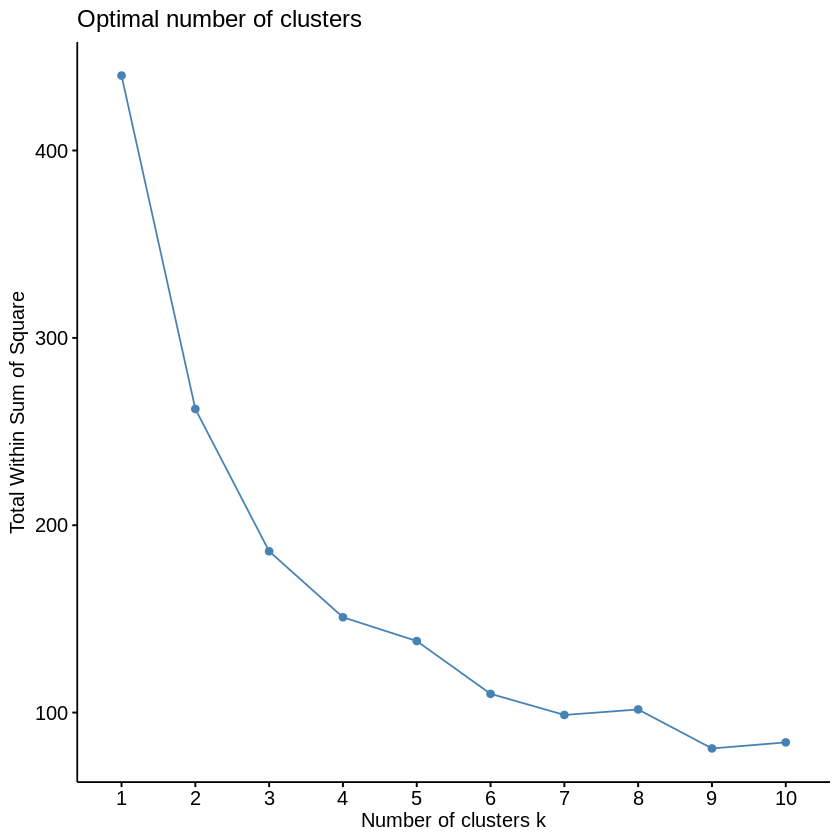

K-means clustering with 5 clusters of sizes 24, 14, 24, 26, 23

Cluster means:
       Ozone    Solar.R        Wind        Temp
1 -0.6002560  0.8240589  0.83912338 -0.69092139
2 -0.8766244 -1.5501726  0.81804242 -1.52975387
3  1.5922672  0.3984891 -1.08744186  1.18911269
4  0.0166711  0.6355184 -0.18519492  0.30828814
5 -0.5203903 -1.0505310 -0.02947315  0.06280309

Clustering vector:
  1   2   3   4   7   8   9  12  13  14  15  16  17  18  19  20  21  22  23  24 
  4   5   5   1   1   2   2   1   1   1   2   1   1   2   1   2   2   1   2   2 
 28  29  30  31  38  40  41  44  47  48  49  50  51  62  63  64  66  67  68  69 
  2   1   3   4   5   4   4   5   1   1   2   5   5   3   4   4   3   4   3   3 
 70  71  73  74  76  77  78  79  80  81  82  85  86  87  88  89  90  91  92  93 
  3   3   1   1   5   4   4   4   3   4   5   3   3   5   5   3   4   4   4   5 
 94  95  99 100 101 104 105 106 108 109 110 111 112 113 114 116 117 118 120 121 
  5   5   3   3   3   4   4   4   5   5   5   

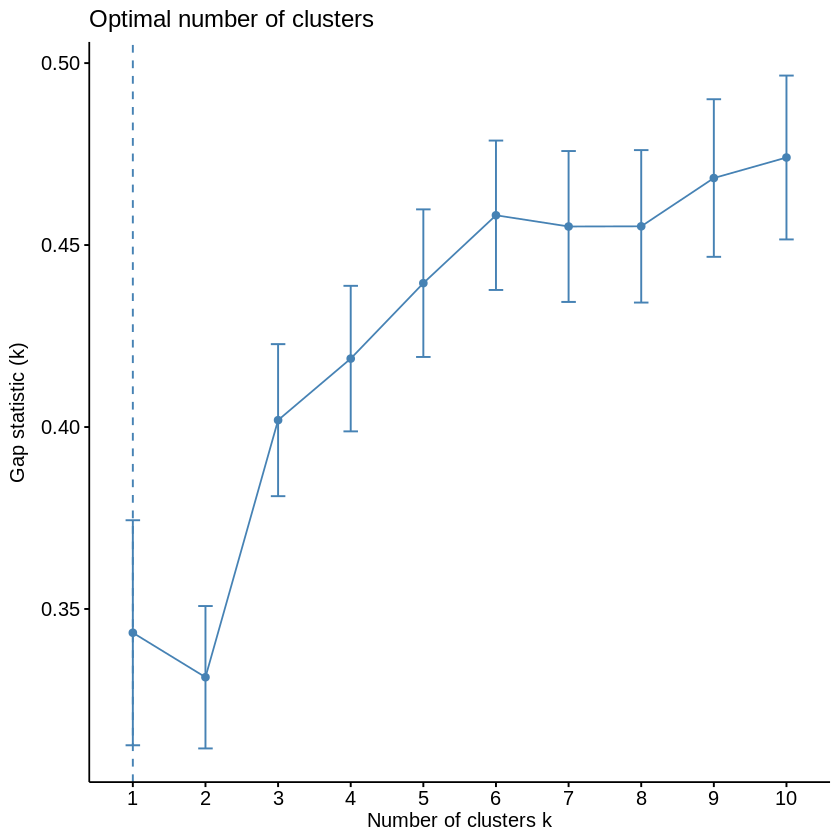

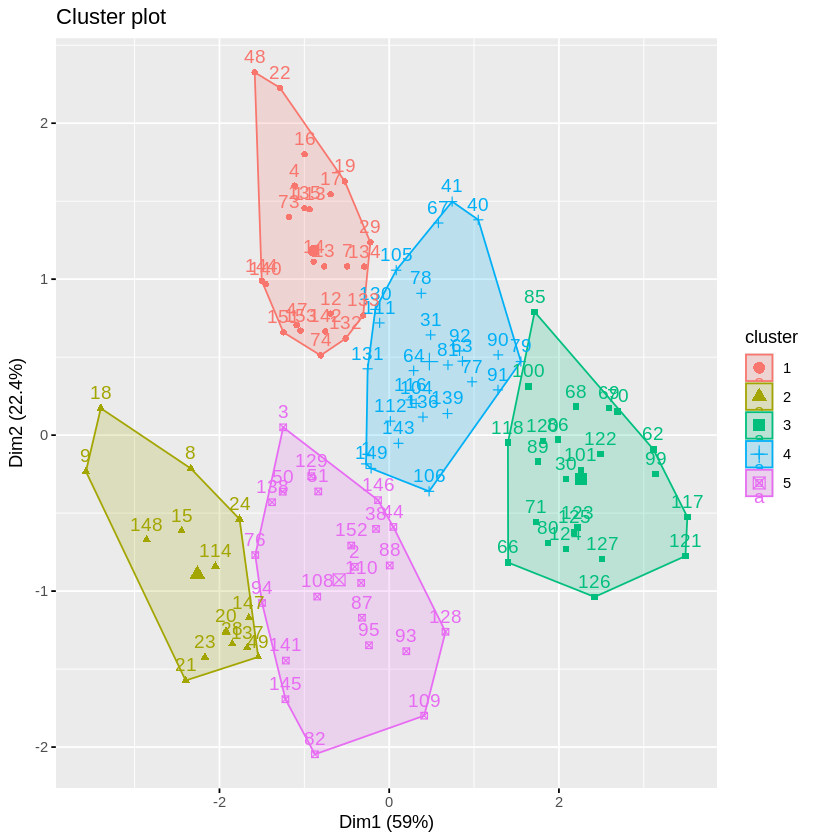

In [ ]:
#Load the dataset with the data() function.
data(airquality)
head(airquality)
# Remove rows with missing values
airquality <- na.omit(airquality)
# From the cleaned data frame, select only the numeric columns for clustering: Ozone, Solar.R, Wind, and Temp.
airquality <- airquality[c("Ozone", "Solar.R", "Wind", "Temp")]
head(airquality)
# Scale your new data frame.
airquality <- scale(airquality)
head(airquality)



# Use the Elbow Method (fviz nbclust) to find the optimal number of clusters. Does the result make sense given what you know about the dataset?
# wss as method.
elbow_plot <- fviz_nbclust(airquality, kmeans, method = "wss", k.max = 10)
# Print the elbow plot
print(elbow_plot)
#calculate gap statistic based on number of clusters
gap_stat <- clusGap(airquality, FUN = kmeans, nstart = 25, K.max = 10, B = 50)
fviz_gap_stat(gap_stat)

# Set a seed for reproducibility
set.seed(1)
# Perform K-means clustering with k = 5 clusters and nstart = 25
km <- kmeans(airquality, centers = 5, nstart = 25)
# View the results
km
# View
fviz_cluster(km, airquality)